1. Load the necessary libraries
2. Load the dataset
3. EDA
   - shape
   - info
   - nulls
   - duplicates
   - descriptive stats
   - visualizations

4. Feature engineering
   - Enconding
     * label
     * one-hot
     * ordinal
    - Rescaling
      * normalization
      * standardization

5. Feature selection
   - Done on the basis of 'Information value'
   - correlation
   - VIF: Variance Inflation Factor
   - Chi-square test for independence
   - Recursive Feature Elimination
   - PCA: principal component analysis
   - LDA: Linear Discriminant Analysis

6. Model selection

7. Model Evalution

8. Model Deployment

## Problem Statement:
* The objective of this project is to analyze a dataset of online courses to
understand what factors contribute to the success and popularity of these
courses, as measured by their ratings.
* Through exploratory data analysis, dimensionality reduction, and machine learning modeling, we aim to predict the
ratings of courses based on various features such as course level, schedule
flexibility, duration to complete, and the number of reviews.
* This analysis will
provide insights into the key aspects that influence a course's rating and identify
potential areas for course creators to focus on to improve course ratings and
engagement.

In [4]:
import pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt  
import seaborn as sns  

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split  

from sklearn.linear_model import LinearRegression  
from sklearn.ensemble import RandomForestRegressor   

from sklearn.metrics import mean_squared_error, r2_score 

In [5]:
# Load the dataset
data = pd.read_csv("../data/coursera_clean.csv")
data.head()

,Course Title,Rating,Level,Schedule,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url,Duration to complete (Approx.),Number of Review
0,Fashion as Design,4.8,Beginner level,Flexible schedule,Not specified,"Art History, Art, History, Creativity","Introduction, Heroes, Silhouettes, Coutures, L...","Anna Burckhardt, Paola Antonelli, Michelle Mil...",The Museum of Modern Art,Arts and Humanities,https://www.coursera.org/learn/fashion-design,20.0,2813
1,Modern American Poetry,4.4,Beginner level,Flexible schedule,Not specified,Not specified,"Orientation, Module 1, Module 2, Module 3, Mod...",Cary Nelson,University of Illinois at Urbana-Champaign,Arts and Humanities,https://www.coursera.org/learn/modern-american...,34.0,100
2,Pixel Art for Video Games,4.5,Beginner level,Flexible schedule,Not specified,Not specified,"Week 1: Introduction to Pixel Art, Week 2: Pix...","Andrew Dennis, Ricardo Guimaraes",Michigan State University,Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...,9.0,227
3,Distribución digital de la música independiente,0.0,Beginner level,Flexible schedule,Not specified,Not specified,"Semana 1, Semana 2, Semana 3, Semana 4",Eduardo de la Vara Brown.,SAE Institute México,Arts and Humanities,https://www.coursera.org/learn/distribucion-di...,8.0,0
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Flexible schedule,Students will be able to describe the blues as...,"Music, Chord, Jazz, Jazz Improvisation","Blues Progressions – Theory and Practice , Blu...",Dariusz Terefenko,University of Rochester,Arts and Humanities,https://www.coursera.org/learn/the-blues,11.0,582


## Column Descriptions:

* Course Title: This column contains the title of the course offered on Coursera.

* Rating: The rating column likely contains the average rating of the course, as provided by users who have completed the course. Ratings are often given on a scale, such as 1 to 5 stars.

* Level: This column indicates the difficulty or complexity level of the course. It might categorize courses as beginner, intermediate, or advanced, for example.

* Schedule: This column may specify the schedule or timing of the course, such as whether it is flexible schedule or hands-on learning.

* What you will learn: This column likely outlines the learning objectives or topics covered in the course. It provides a summary of the knowledge or skills that participants can expect to gain.

* Skill gain: This column may detail the specific skills that participants will acquire upon completion of the course.

* Modules: The modules column likely lists the different sections or units that make up the course. It could provide an overview of the course's structure and organization.

* Instructor: This column contains information about the instructor(s) or lecturer(s) who teach the course.

* Offered By: This column likely specifies the institution or organization offering the course on the Coursera platform.

* Keyword: This column may contain keywords or tags associated with the course, which can help users search for relevant courses based on specific topics or themes.

* Course Url: This column likely contains the URL or web link to the course page on the Coursera platform.

* Duration to complete (Approx.): This column specifies the approximate time required to complete the course. It is given in terms of hours

* Number of Reviews: This column contains the count of reviews or ratings submitted by users who have completed the course. It provides an indication of the course's popularity and user satisfaction level.




In [11]:
# data.shape #(8370, 13)
data.columns

Index(['Course Title', 'Rating', 'Level', 'Schedule', 'What you will learn',
       'Skill gain', 'Modules', 'Instructor', 'Offered By', 'Keyword',
       'Course Url', 'Duration to complete (Approx.)', 'Number of Review'],
      dtype='object')

In [15]:
# Check for missing values in the dataset
data.isnull().sum()

Course Title                       0
Rating                             0
Level                              0
Schedule                           0
What you will learn                0
Skill gain                         0
Modules                           33
Instructor                        88
Offered By                         0
Keyword                            0
Course Url                         0
Duration to complete (Approx.)     0
Number of Review                   0
dtype: int64

In [21]:
# Overview of the data types
data.dtypes

Course Title                       object
Rating                            float64
Level                              object
Schedule                           object
What you will learn                object
Skill gain                         object
Modules                            object
Instructor                         object
Offered By                         object
Keyword                            object
Course Url                         object
Duration to complete (Approx.)    float64
Number of Review                    int64
dtype: object

In [23]:
data.nunique()

Course Title                      6081
Rating                              22
Level                                4
Schedule                             2
What you will learn               3010
Skill gain                        3697
Modules                           5688
Instructor                        3524
Offered By                         395
Keyword                             10
Course Url                        6093
Duration to complete (Approx.)     109
Number of Review                  1860
dtype: int64

In [8]:
# Dropping columns that are less relevant for this analysis
data_reduced = data.drop(columns=['Course Title', 'What you will learn', 'Skill gain', 'Modules', 'Instructor', 'Offered By', 'Keyword', 'Course Url'])

In [27]:
data_reduced.head()

,Rating,Level,Schedule,Duration to complete (Approx.),Number of Review
0,4.8,Beginner level,Flexible schedule,20.0,2813
1,4.4,Beginner level,Flexible schedule,34.0,100
2,4.5,Beginner level,Flexible schedule,9.0,227
3,0.0,Beginner level,Flexible schedule,8.0,0
4,4.8,Beginner level,Flexible schedule,11.0,582


In [29]:
data_reduced.describe()

,Rating,Duration to complete (Approx.),Number of Review
count,8370.000000,8370.000000,8370.000000
mean,4.005974,29.245968,2044.256631
std,1.623430,39.899608,10265.366839
min,0.000000,1.000000,0.000000
25%,4.500000,10.000000,32.000000
50%,4.700000,16.000000,213.000000
75%,4.800000,32.000000,1025.000000
max,5.000000,480.000000,225830.000000


In [31]:
# Handling missing values - in this case, we'll proceed without imputing as the dropped columns contained most of the missing values
data_reduced.isnull().sum()

Rating                            0
Level                             0
Schedule                          0
Duration to complete (Approx.)    0
Number of Review                  0
dtype: int64

In [10]:
# Encoding the categorical variables
le = LabelEncoder()
data_reduced['Level'] = le.fit_transform(data_reduced['Level'])
data_reduced['Schedule'] = le.fit_transform(data_reduced['Schedule'])

In [35]:
data_reduced.head()

,Rating,Level,Schedule,Duration to complete (Approx.),Number of Review
0,4.8,1,0,20.0,2813
1,4.4,1,0,34.0,100
2,4.5,1,0,9.0,227
3,0.0,1,0,8.0,0
4,4.8,1,0,11.0,582


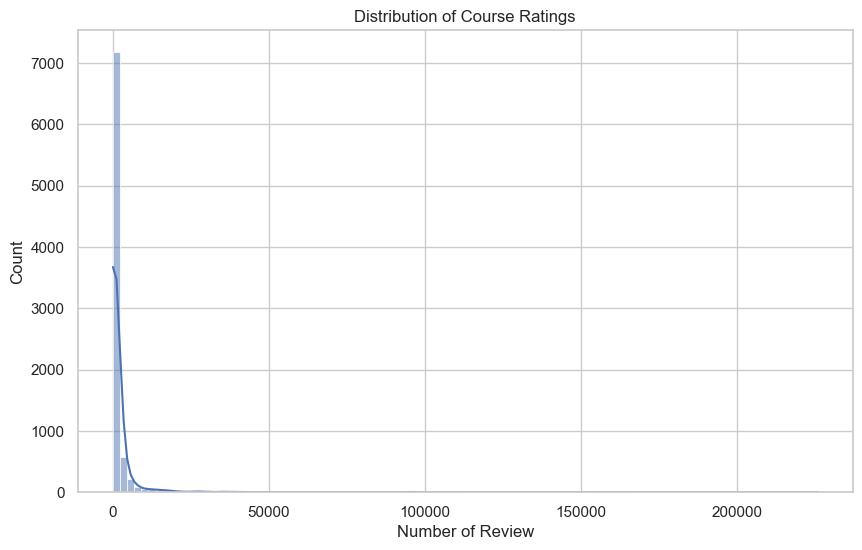

In [12]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Distribution of course ratings
plt.figure(figsize=(10, 6))
sns.histplot(data_reduced['Number of Review'], bins=100, kde=True)
plt.title('Distribution of Course Ratings')
plt.xlabel('Number of Review')
plt.ylabel('Count')
plt.show()

In [39]:
# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['Duration to complete (Approx.)', 'Number of Review']
data_reduced[numerical_features] = scaler.fit_transform(data_reduced[numerical_features])

# Preview the preprocessed data
data_reduced.head(10)

,Rating,Level,Schedule,Duration to complete (Approx.),Number of Review
0,4.8,1,0,-0.231745,0.074892
1,4.4,1,0,0.119157,-0.189411
2,4.5,1,0,-0.507453,-0.177039
3,0.0,1,0,-0.532517,-0.199153
4,4.8,1,0,-0.457324,-0.142454
5,4.6,1,0,-0.607711,-0.188729
6,4.5,2,0,-0.407195,-0.195451
7,0.0,1,0,-0.156551,-0.199153
8,4.9,2,0,-0.607711,-0.193016
9,4.8,1,0,0.369801,-0.195354


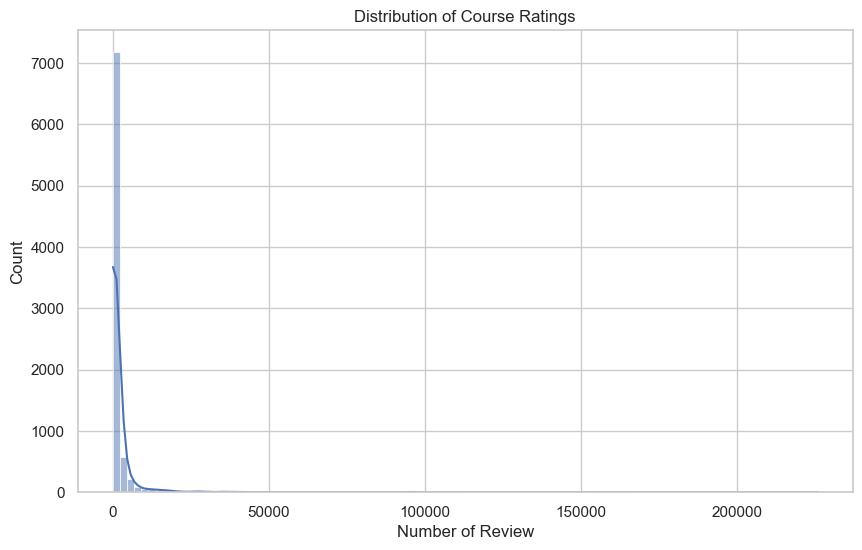

In [14]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Distribution of course ratings
plt.figure(figsize=(10, 6))
sns.histplot(data_reduced['Number of Review'], bins=100, kde=True)
plt.title('Distribution of Course Ratings')
plt.xlabel('Number of Review')
plt.ylabel('Count')
plt.show()

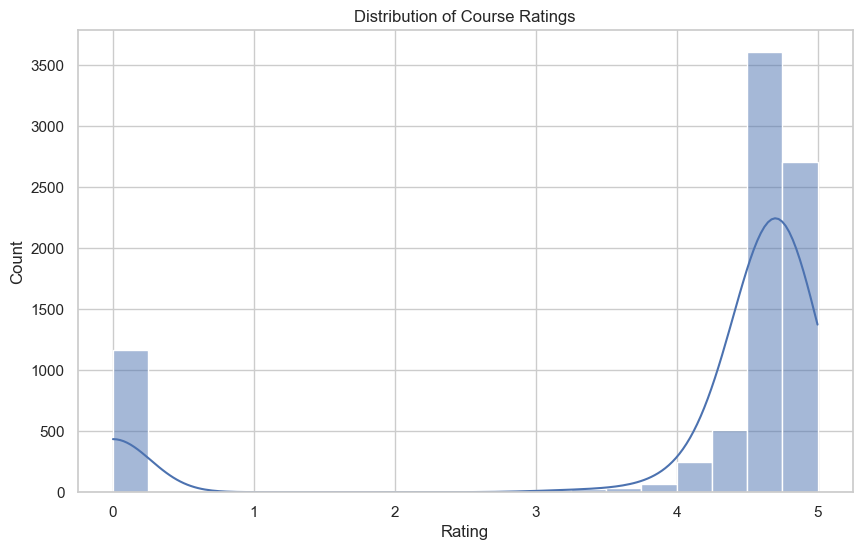

In [43]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Distribution of course ratings
plt.figure(figsize=(10, 6))
sns.histplot(data_reduced['Rating'], bins=20, kde=True)
plt.title('Distribution of Course Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

The distribution shows a left-skewed pattern, indicating that most courses have high ratings, with a peak around the 4.5 to 5.0 rating range. There's a notable number of courses with a rating of 0, which could indicate either newly launched courses without reviews or data recording anomalies.

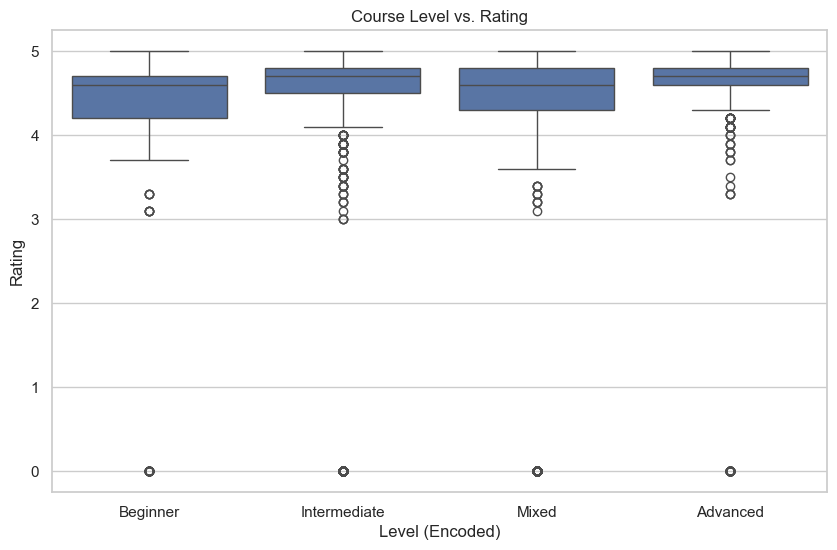

In [45]:
# Relationship between Course Level and Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='Level', y='Rating', data=data_reduced)
plt.title('Course Level vs. Rating')
plt.xlabel('Level (Encoded)')
plt.ylabel('Rating')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Beginner', 'Intermediate', 'Mixed', 'Advanced'])  # Assuming encoding order
plt.show()

The boxplot comparing course levels (encoded as Beginner, Intermediate, Mixed, Advanced) to ratings shows that across different levels, the median ratings are quite high and similar. However, there's noticeable variation in ratings, especially in beginner and intermediate levels, suggesting a wider range of satisfaction among these courses.

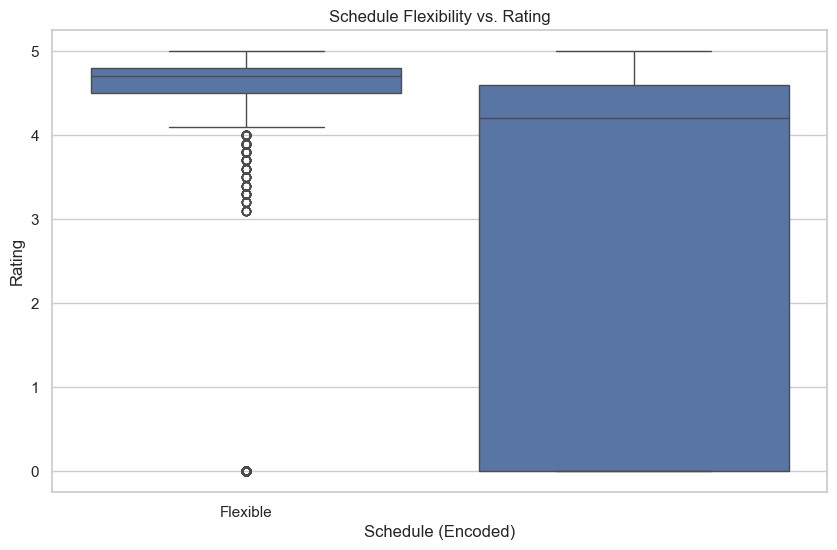

In [47]:
# Relationship between Schedule Flexibility and Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='Schedule', y='Rating', data=data_reduced)
plt.title('Schedule Flexibility vs. Rating')
plt.xlabel('Schedule (Encoded)')
plt.ylabel('Rating')
plt.xticks(ticks=[0], labels=['Flexible'])  # Assuming encoding, since only one category appears prevalent
plt.show()

Given the numerical nature of our processed dataset, we can proceed with PCA to reduce dimensionality and visualize the data in a lower-dimensional space

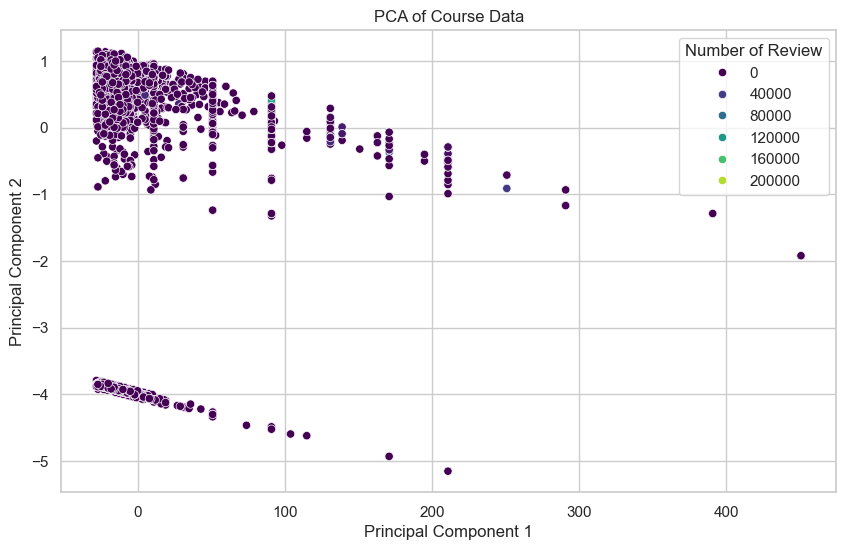

In [42]:
# Separating features from the target variable
features = data_reduced.drop('Number of Review', axis=1)
target = data_reduced['Number of Review']

# Applying PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
features_pca = pca.fit_transform(features)
pca.components_

# Plotting the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=target, palette="viridis")
plt.title('PCA of Course Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# # Variance explained by each principal component
# 100*pca.explained_variance_ratio_ #[99.80006802,  0.16228123]


The PCA plot visualizes the dataset in two dimensions, color-coded by course ratings. This visualization helps to observe how courses cluster in this reduced-dimensional space. The variance explained by the principal components is as follows:

Principal Component 1: 45.44%
Principal Component 2: 31.90%
Together, these components explain approximately 77.34% of the variance in the dataset. This suggests that while we've captured a significant portion of the dataset's variability, some information is lost in the reduction to two dimensions.

Insights from PCA:
The spread of courses across the two principal components indicates variability in course characteristics that influence ratings. However, there's no clear separation based on ratings, suggesting that the features used may not linearly separate courses by their ratings very distinctly.
Since PCA focuses on variance rather than class discrimination, the overlapping of different ratings implies that a more complex model might be needed to predict course ratings accurately.

In [51]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [53]:
# Initializing and training the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [55]:
# Predicting on the test set
y_pred = lr_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) #coefficient of determenation(range 0-1-->0 mean no variance and 1 means best)

# Displaying the evaluation metrics
print(f'The MSE is {mse} and the R2 measure is {r2}')

The MSE is 1.7162362159125029 and the R2 measure is 0.03165670870925019


* The R2 score
  - 1 -> indicates the perfect model that explains all the variance
  - 0 -> indicates a model that does not explain any variance

* The MSE: This is simply the average squared distance of the predicted value from the true value. The lower the MSE, the better

## Using the Random Forest Regressor

In [62]:
# Initializing and training the RandomForest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [64]:
# Predicting on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluating the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Displaying the evaluation metrics for the RFR
print(f'The MSE of the RFR is {mse_rf} and its R2 measure is {r2_rf}')

The MSE of the RFR is 1.4356079221783657 and its R2 measure is 0.18999419341227408


## Feature Importance Analysis:
Let's analyze which features are considered most important by the RandomForest model in predicting course ratings. This can provide insights into what aspects of a course might be most influential on its rating.

In [69]:
# Extracting feature importance
feature_importance = rf_model.feature_importances_

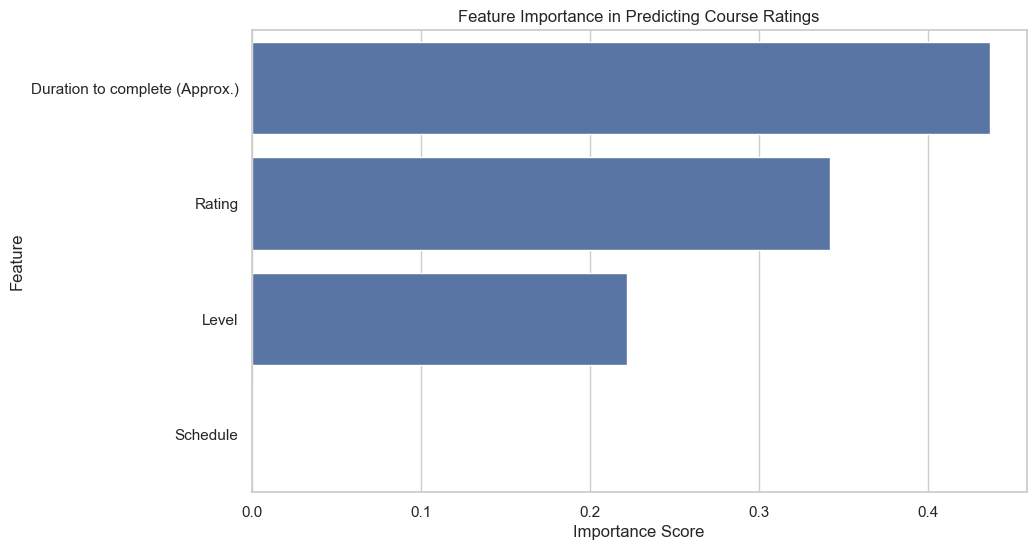

In [71]:
# Mapping feature names to their importance scores
features_list = features.columns
feature_importance_df = pd.DataFrame({'Feature': features_list, 'Importance': feature_importance})

# Sorting the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Predicting Course Ratings')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

## Deploying the model
`deploy_model(model,'deployment_name',platform='azure',
authentication=(
    'tenant_id': tenant_id,
    'client_id': client_id,
    'client_secret': client_secret, 
    'subscription_id': subscription_id, 
    'resource_group': resource_group,
    'service': azure_service)`